In [1]:
import pandas as pd
import numpy as np

In [13]:
excel_file = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [14]:
sheet_names = excel_file.sheet_names

In [15]:
sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [16]:
for sheet_name in sheet_names:
    sheet_data = excel_file.parse(sheet_name)  # Load the sheet data
    csv_filename = f'{sheet_name}.csv'         # Create the CSV filename
    
    sheet_data.to_csv(csv_filename, index=False)  # Save the sheet data as CSV
    print(f'Saved {csv_filename}')

Saved Title Sheet.csv
Saved Transactions.csv
Saved NewCustomerList.csv
Saved CustomerDemographic.csv
Saved CustomerAddress.csv


## Transactions data

In [21]:
transactions = pd.read_csv("Transactions.csv")

In [22]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [24]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [25]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  float64
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 2.0+ MB


In [27]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### Since we have less number of missing values, we can delete those

In [29]:
transactions_cleaned = transactions.dropna()

In [31]:
transactions_cleaned.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [35]:
#count of online orders
transactions_cleaned['online_order'].value_counts()

online_order
1.0    9739
0.0    9706
Name: count, dtype: int64

In [36]:
transactions_cleaned.to_csv('transactions_cleaned.csv', index=False)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#discrete columns
dis_col = transactions_cleaned.select_dtypes(include = ['object']).columns

#continuous columns
con_col = transactions_cleaned.select_dtypes(include = ['int64', 'float64']).columns

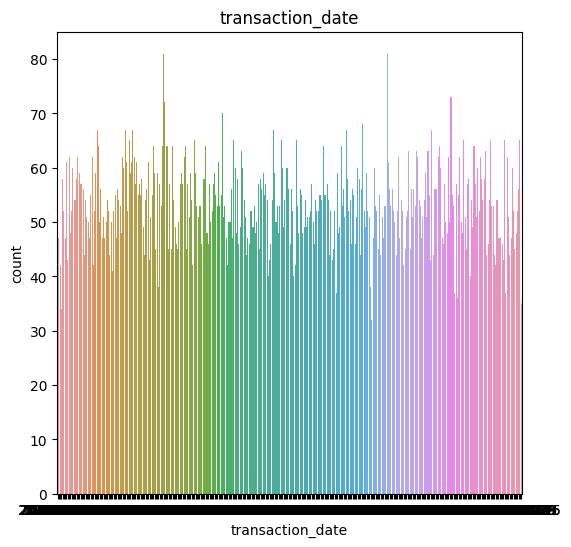

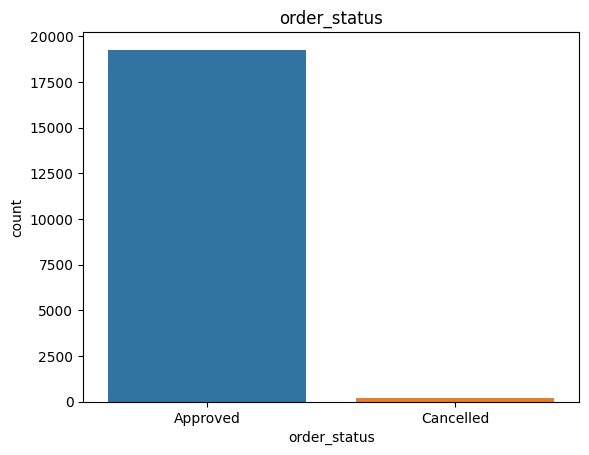

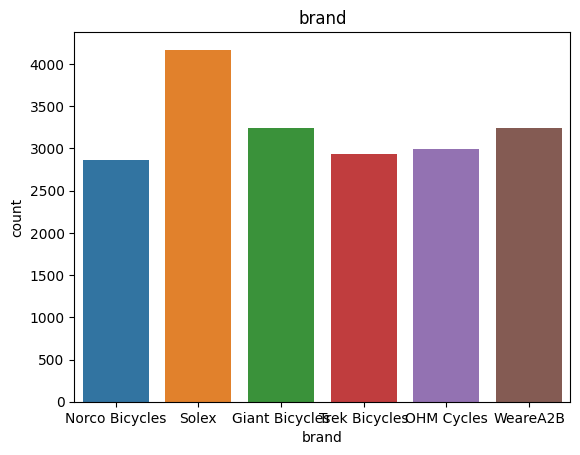

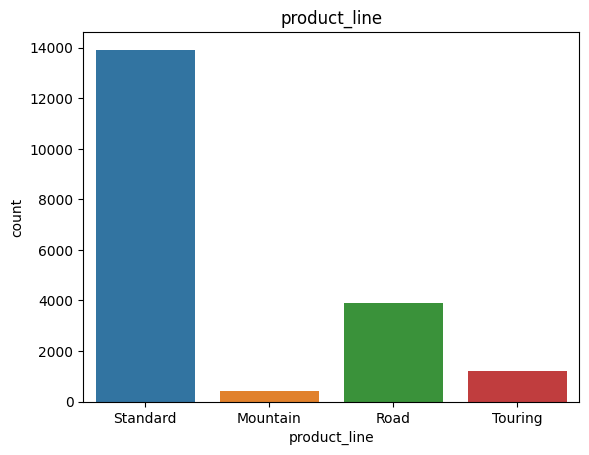

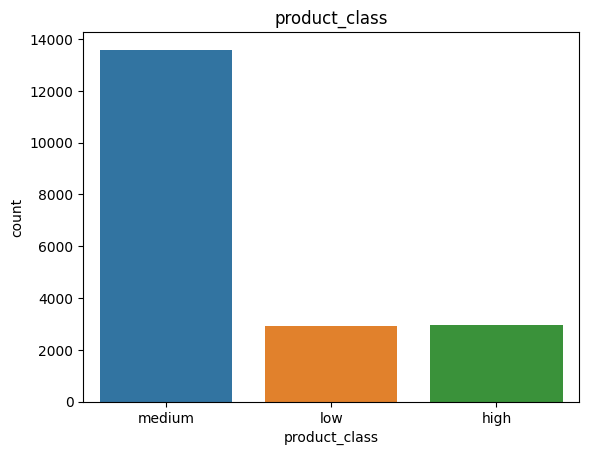

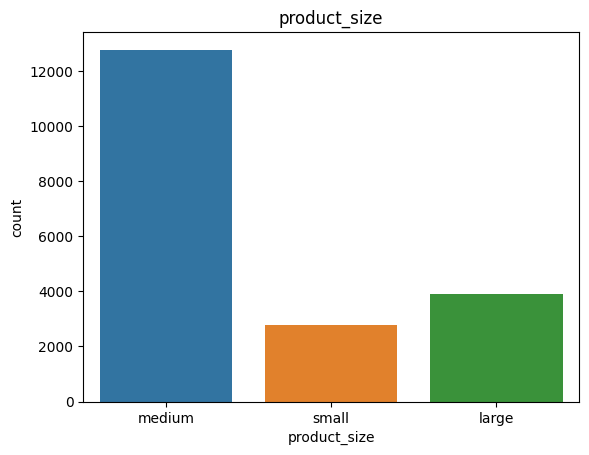

In [40]:
plt.figure(figsize=(6, 6))

for col in dis_col:
    sns.countplot(data = transactions_cleaned, x = col)
    plt.title(col)
    plt.show()

<Figure size 600x600 with 0 Axes>

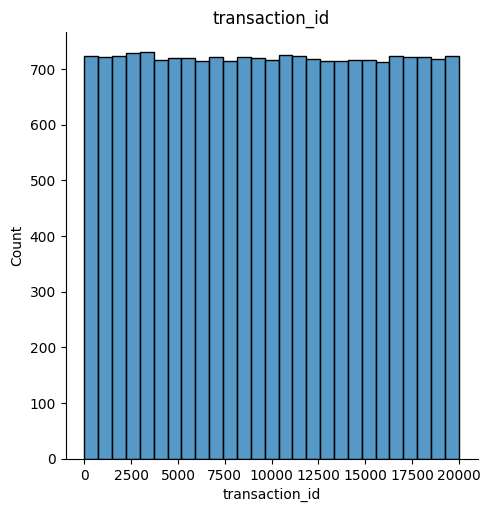

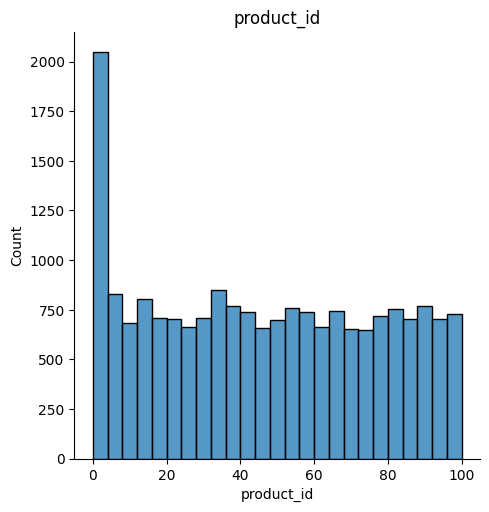

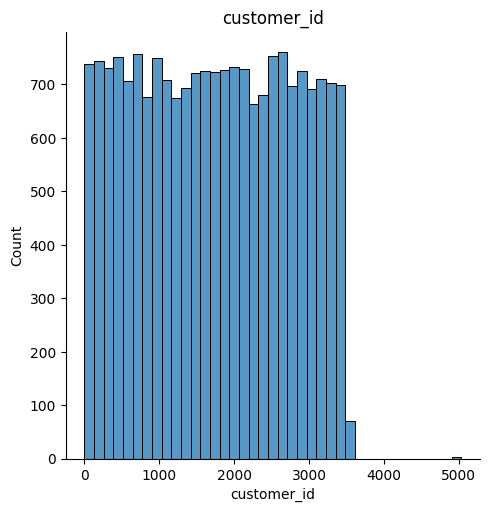

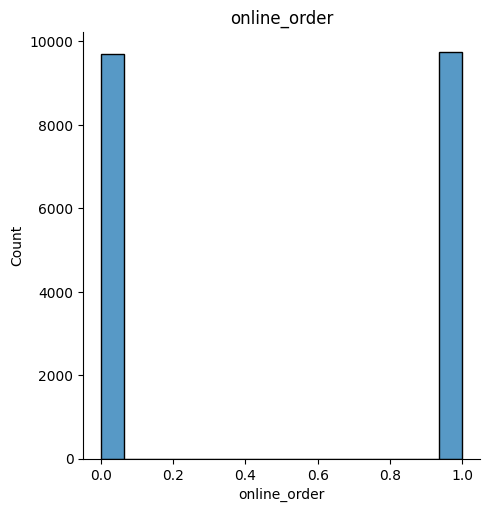

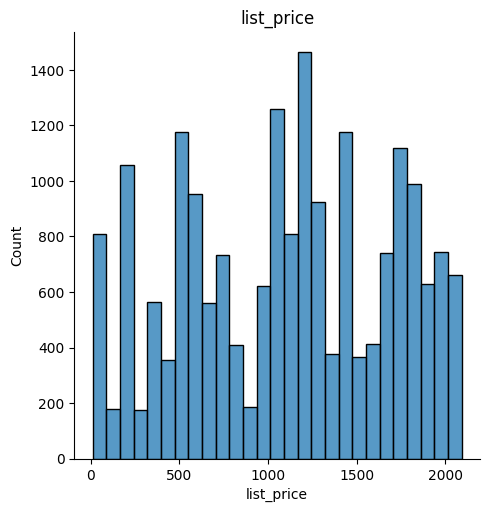

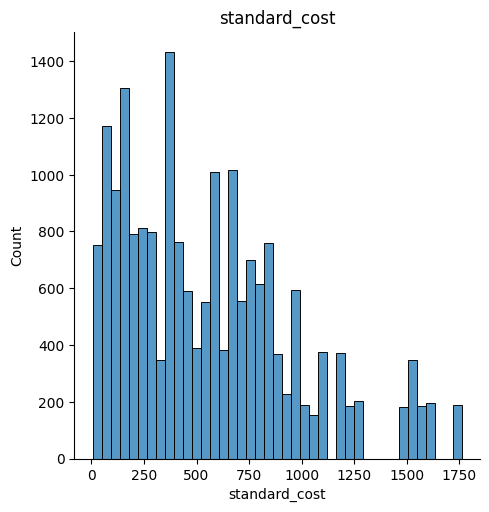

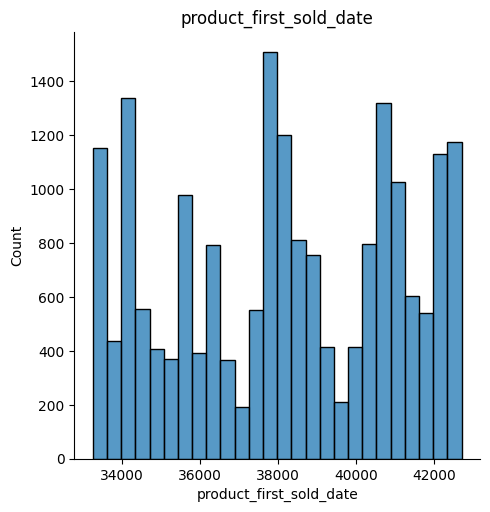

In [41]:
plt.figure(figsize = (6, 6))

for col in con_col:
    sns.displot(data = transactions_cleaned, x = col)
    plt.title(col)
    plt.show()

## NewCustomerList

In [42]:
NewCustomer = pd.read_csv("NewCustomerList.csv")

In [45]:
NewCustomer.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [46]:
NewCustomer_cleaned = NewCustomer.dropna()

In [47]:
NewCustomer_cleaned.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Unnamed: 16                            0
Unnamed: 17                            0
Unnamed: 18                            0
Unnamed: 19                            0
Unnamed: 20                            0
Rank                                   0
Value                                  0
dtype: int64

In [48]:
NewCustomer_cleaned.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [49]:
# Delete columns Unnames
columns_to_drop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20']
NewCustomer_cleaned = NewCustomer_cleaned.drop(columns=columns_to_drop)

In [50]:
NewCustomer_cleaned.to_csv('NewCustomer_cleaned.csv', index=False)

## CustomerAddress

In [32]:
customer_address = pd.read_csv("CustomerAddress.csv")

In [33]:
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [54]:
customer_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [34]:
customer_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [35]:
customer_address['state'].replace({'New South Wales': "NSW", 'Victoria': "VIC"}, inplace = True)

In [36]:
customer_address['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [55]:
#checking if ID values are all unique
customer_address['customer_id'].is_unique

True

In [56]:
customer_address.duplicated(subset=['address','postcode']).value_counts()

False    3999
Name: count, dtype: int64

In [37]:
customer_address_cleaned = customer_address

In [38]:
customer_address_cleaned.to_csv('customer_address_cleaned.csv', index=False)

## Customer Demographic

In [2]:
customer_demographic = pd.read_csv("CustomerDemographic.csv")

In [3]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
customer_demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
customer_demographic_cleaned = customer_demographic.dropna()

In [6]:
#dropping the column with unnecessary data: default
del customer_demographic_cleaned["default"]

In [7]:
#checking the values present in gender column
customer_demographic_cleaned['gender'].value_counts()

gender
Female    1366
Male      1262
F            1
Femal        1
Name: count, dtype: int64

In [8]:
#replacing all values to either male or female
customer_demographic_cleaned['gender'].replace({'M': "Male", 'F': "Female", 'Femal': "Female"}, inplace = True)

/tmp/ipykernel_95153/1259418048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demographic_cleaned['gender'].replace({'M': "Male", 'F': "Female", 'Femal': "Female"}, inplace = True)


In [9]:
customer_demographic_cleaned['gender'].value_counts()

gender
Female    1368
Male      1262
Name: count, dtype: int64

In [10]:
# check the frequency of job industries
customer_demographic_cleaned['job_industry_category'].value_counts()

job_industry_category
Manufacturing         635
Financial Services    626
Health                496
Retail                278
Property              222
IT                    119
Entertainment         110
Argiculture            91
Telecommunications     53
Name: count, dtype: int64

In [15]:
# make sure all dates are in the correct format
#customer_demographic_cleaned['DOB'] = customer_demographic_cleaned['DOB'].dt.date
type(customer_demographic_cleaned['DOB'])

pandas.core.series.Series

In [16]:
customer_demographic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2630 non-null   int64  
 1   first_name                           2630 non-null   object 
 2   last_name                            2630 non-null   object 
 3   gender                               2630 non-null   object 
 4   past_3_years_bike_related_purchases  2630 non-null   int64  
 5   DOB                                  2630 non-null   object 
 6   job_title                            2630 non-null   object 
 7   job_industry_category                2630 non-null   object 
 8   wealth_segment                       2630 non-null   object 
 9   deceased_indicator                   2630 non-null   object 
 10  owns_car                             2630 non-null   object 
 11  tenure                             

In [20]:
import pandas as pd
from datetime import datetime

# # Convert 'DateOfBirth' column to datetime
# customer_demographic_cleaned['DOB'] = pd.to_datetime(['DOB'])

# # Calculate ages and add 'Age' column
# current_date = datetime.now()
# customer_demographic_cleaned['Age'] = current_date.year - customer_demographic_cleaned['DOB'].dt.year - ((current_date.month, current_date.day) < (customer_demographic_cleaned['DOB'].dt.month, customer_demographic_cleaned['DOB'].dt.day))

# # Display the updated DataFrame
# #print(df)


In [ ]:
# Convert 'DateOfBirth' column to datetime
customer_demographic_cleaned['DOB'] = pd.to_datetime(customer_demographic_cleaned['DOB'], format='%Y-%m-%d %H:%M:%S')


In [25]:
import torch

In [26]:

# Calculate ages and add 'Age' column
current_date = datetime.now()
#customer_demographic_cleaned['Age'] = current_date.year - customer_demographic_cleaned['DOB'].dt.year - ((current_date.month, current_date.day) < (customer_demographic_cleaned['DOB'].dt.month, customer_demographic_cleaned['DOB'].dt.day))
#customer_demographic_cleaned['Age'] = current_date.year - customer_demographic_cleaned['DOB'].dt.year - ((current_date.month, current_date.day) < (customer_demographic_cleaned['DOB'].dt.month, customer_demographic_cleaned['DOB'].dt.day))
# Display the updated DataFrame
#print(df)

# Calculate ages using dob_tensor
dob_tensor = torch.tensor([(current_date - dob).days / 365.25 for dob in customer_demographic_cleaned['DOB']])
customer_demographic_cleaned['Age'] = dob_tensor

/tmp/ipykernel_95153/609277470.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demographic_cleaned['Age'] = dob_tensor


In [27]:
customer_demographic_cleaned['Age']

0       69.845314
1       42.666668
2       69.571526
8       50.436687
9       34.847366
          ...    
3992    48.698151
3993    34.360027
3994    47.679672
3995    48.021904
3996    22.094456
Name: Age, Length: 2630, dtype: float32

In [29]:
customer_demographic_cleaned['Age'] = customer_demographic_cleaned['Age'].astype(int)

/tmp/ipykernel_95153/3516934015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demographic_cleaned['Age'] = customer_demographic_cleaned['Age'].astype(int)


In [30]:
customer_demographic_cleaned.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,34


In [31]:
customer_demographic_cleaned.to_csv('customer_demographic_cleaned.csv', index=False)